# Analysis of Australian House Price Index 

Analysis focus

i) What do housing-market indicators say about the economic conditions in different geographical locations ? 
ii) how can they be used to provide forecasts of future economic conditions?

DESCRIPTION 

Housing markets generally describes the supply and demands for houses in a specific geographic location. Housing market trends can be analysed using various indicators like House Price Index, construction, local sales and so on. This question specifically focuses on housing market and its correlation with economic condition of different geographical location. It also mentions about how efficient the analysis made on housing markets can be used in future economic prediction.
Considering House Price Index(HPI) as a key indicator of housing market, analysing how a fall/growth of a HPI creates a impact on economic condition. Finally, providing valuable insights for business stakeholders like real estate owners, government and property buyers who may be interested in this analysis.
For eg: real estate owners or property buyers who wants to sell or buy property, to identify the right time to buy or sell.DATA SOURCES 

DATA SOURCES 

Two different set of sources are utilised in this analysis. The first set of data is derived from Queensland Government site (https://www.qgso.qld.gov.au/statistics/theme/economy/prices-indexes/housing) which describes about the house price index of Sydney, Brisbane and Melbourne from the year 2002 to 2019. The second set of data is derived from economy.id community (https://economy.id.com.au/sydney/consumer-price-index), which describes about the Consumer Price Index(CPI) of Sydney and whole Australia. 

In [1]:
#library imports
import pandas as pd                # used for data manipulation and data analysis
import matplotlib.pyplot as plt    # used for visualisation

#code to obtain HPI data 
file_path = "HPI-brisbane-sydney-melbourne.csv"
import chardet                                 #To overcome unicode-decode error
with open(file_path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

data1 = pd.read_csv(file_path, encoding = 'Windows-1252')            #HPI data

#code to obtain CPI data
file_path = "Consumer Price Index.xlsx"
import chardet
with open(file_path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

data2 = pd.read_excel(file_path, encoding = 'Windows-1252')          #CPI data

ANALYSIS for HPI DATA

In [2]:
#Viewing HPI data
data1

,"House Price Index (a)(b): Brisbane, Sydney and Melbourne, 2002–03 to 2018–19",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Financial year (c),Capital city,NaN,NaN,NaN,NaN,NaN
2,NaN,Brisbane,NaN,Sydney,NaN,Melbourne,NaN
3,NaN,Index,Annual % change,Index,Annual % change,Index,Annual % change
4,2002–03,52.6,n.a.,78.2,n.a.,54.1,n.a.
5,2003–04,69.7,32.5,87.5,11.9,60.1,11.1
6,2004–05,72.6,4.2,84.1,–3.9,61.2,1.8
7,2005–06,75.4,3.9,81.6,–3.0,63.9,4.4
8,2006–07,83.1,10.2,83.6,2.5,70.4,10.2
9,2007–08,98.8,18.9,89.1,6.6,84.1,19.5


In [3]:
#knowing the datasets
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
House Price Index (a)(b): Brisbane, Sydney and Melbourne, 2002–03 to 2018–19    24 non-null object
Unnamed: 1                                                                      20 non-null object
Unnamed: 2                                                                      18 non-null object
Unnamed: 3                                                                      19 non-null object
Unnamed: 4                                                                      18 non-null object
Unnamed: 5                                                                      19 non-null object
Unnamed: 6                                                                      18 non-null object
dtypes: object(7)
memory usage: 2.0+ KB


In [4]:
#pre-processing data- removing unnecessary columns, rows and replacing missing values
#changing column names
data1 = data1[4:21]                                     #removing descriptions and empty cells
data1

,"House Price Index (a)(b): Brisbane, Sydney and Melbourne, 2002–03 to 2018–19",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
4,2002–03,52.6,n.a.,78.2,n.a.,54.1,n.a.
5,2003–04,69.7,32.5,87.5,11.9,60.1,11.1
6,2004–05,72.6,4.2,84.1,–3.9,61.2,1.8
7,2005–06,75.4,3.9,81.6,–3.0,63.9,4.4
8,2006–07,83.1,10.2,83.6,2.5,70.4,10.2
9,2007–08,98.8,18.9,89.1,6.6,84.1,19.5
10,2008–09,97.4,–1.4,85.8,–3.7,83.5,–0.7
11,2009–10,105.7,8.5,97.8,14.0,100.2,20.0
12,2010–11,104.6,–1.0,102.2,4.5,104.8,4.6
13,2011–12,100.0,–4.4,100.0,–2.2,100.0,–4.6


In [5]:
#This analysis focuses on House price index alone, hence dropping Annual % change column 
#(Unnamed:2,Unnamed:4, Unnamed:6)
data1 = data1.drop(columns = ["Unnamed: 2", 'Unnamed: 4','Unnamed: 6' ])
data1

,"House Price Index (a)(b): Brisbane, Sydney and Melbourne, 2002–03 to 2018–19",Unnamed: 1,Unnamed: 3,Unnamed: 5
4,2002–03,52.6,78.2,54.1
5,2003–04,69.7,87.5,60.1
6,2004–05,72.6,84.1,61.2
7,2005–06,75.4,81.6,63.9
8,2006–07,83.1,83.6,70.4
9,2007–08,98.8,89.1,84.1
10,2008–09,97.4,85.8,83.5
11,2009–10,105.7,97.8,100.2
12,2010–11,104.6,102.2,104.8
13,2011–12,100.0,100.0,100.0


In [6]:
#Renaming the columns
data1 = data1.rename(columns={'House Price Index (a)(b): Brisbane, Sydney and Melbourne, 2002–03 to 2018–19' : 'Financial_Year', "Unnamed: 1": "Brisbane_HPI", "Unnamed: 3" :"Sydney_HPI", "Unnamed: 5":"Melbourne_HPI"})
data1

,Financial_Year,Brisbane_HPI,Sydney_HPI,Melbourne_HPI
4,2002–03,52.6,78.2,54.1
5,2003–04,69.7,87.5,60.1
6,2004–05,72.6,84.1,61.2
7,2005–06,75.4,81.6,63.9
8,2006–07,83.1,83.6,70.4
9,2007–08,98.8,89.1,84.1
10,2008–09,97.4,85.8,83.5
11,2009–10,105.7,97.8,100.2
12,2010–11,104.6,102.2,104.8
13,2011–12,100.0,100.0,100.0


In [7]:
#viewing pre-processed dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 4 to 20
Data columns (total 4 columns):
Financial_Year    17 non-null object
Brisbane_HPI      17 non-null object
Sydney_HPI        17 non-null object
Melbourne_HPI     17 non-null object
dtypes: object(4)
memory usage: 676.0+ bytes


In [8]:
#converting datatypes of Brisbane_HPI, Sydney_HPI, Melbourne_HPI to float (for easy plotting)

data1['Brisbane_HPI'] = data1.Brisbane_HPI.astype(float)
data1['Sydney_HPI'] = data1.Sydney_HPI.astype(float)
data1['Melbourne_HPI']= data1.Melbourne_HPI.astype(float)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 4 to 20
Data columns (total 4 columns):
Financial_Year    17 non-null object
Brisbane_HPI      17 non-null float64
Sydney_HPI        17 non-null float64
Melbourne_HPI     17 non-null float64
dtypes: float64(3), object(1)
memory usage: 676.0+ bytes


VISUALISATION

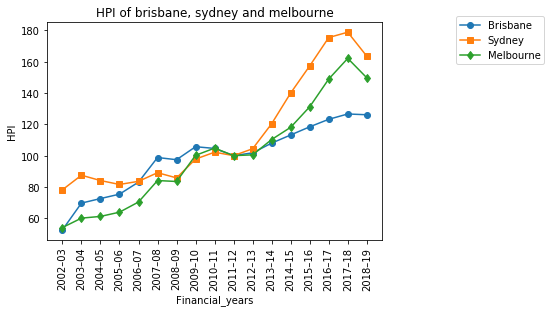

In [9]:
plt.plot(data1.Financial_Year,data1['Brisbane_HPI'],"o-",label = "Brisbane")
plt.plot(data1.Financial_Year,data1['Sydney_HPI'], "s-",label = "Sydney")
plt.plot(data1.Financial_Year,data1['Melbourne_HPI'],"d-", label ="Melbourne")
plt.ylabel('HPI')
plt.xlabel('Financial_years')
plt.xticks(rotation = 90)
plt.title('HPI of brisbane, sydney and melbourne')
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()

Observation: The above visualisation shows the trends of House Price Index of Brisbane, Sydney and Melbourne from the year 2002 to 2019. From the line chart, it is clear that HPI of Sydney and Melbourne had faced a great fall during the year 2018-19, whereas it also had a gradual rise till 2017-18.

CPI of either Sydney or melbourne can be analysed to check whether fall in HPI have created a impact on CPI.

ANALYSIS for CPI DATA

In [10]:
#Viewing dataset
data2

,Consumer Price Index (CPI),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Sydney,NaN,Australia,NaN,NaN,NaN
1,Quarter ending,Index number,% change from previous year,Index number,% change from previous year,NaN,NaN
2,2019-06-01 00:00:00,115.9,1.7,114.8,1.6,NaN,NaN
3,2019-03-01 00:00:00,115.1,1.3,114.1,1.3,NaN,NaN
4,2018-12-01 00:00:00,115.2,1.7,114.1,1.8,NaN,NaN
...,...,...,...,...,...,...,...
72,2001-12-01 00:00:00,76.3,3.4,75.4,3.1,NaN,NaN
73,2001-09-01 00:00:00,75.6,2.9,74.7,2.5,NaN,NaN
74,2001-06-01 00:00:00,75.4,6.3,74.5,6.1,NaN,NaN
75,2001-03-01 00:00:00,74.8,6.4,73.9,6,NaN,NaN


In [11]:
#knowing the data
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
Consumer Price Index (CPI)    76 non-null object
Unnamed: 1                    76 non-null object
Unnamed: 2                    75 non-null object
Unnamed: 3                    76 non-null object
Unnamed: 4                    75 non-null object
Unnamed: 5                    0 non-null float64
Unnamed: 6                    0 non-null float64
dtypes: float64(2), object(5)
memory usage: 4.3+ KB


In [12]:
#pre-processing data- removing unnecessary columns, rows and replacing missing values
#changing column names
data2 = data2[2:76]                                     #removing descriptions and empty cells
data2

,Consumer Price Index (CPI),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
2,2019-06-01 00:00:00,115.9,1.7,114.8,1.6,NaN,NaN
3,2019-03-01 00:00:00,115.1,1.3,114.1,1.3,NaN,NaN
4,2018-12-01 00:00:00,115.2,1.7,114.1,1.8,NaN,NaN
5,2018-09-01 00:00:00,114.7,2,113.5,1.9,NaN,NaN
6,2018-06-01 00:00:00,114,2.1,113,2.1,NaN,NaN
...,...,...,...,...,...,...,...
71,2002-03-01 00:00:00,77,2.9,76.1,3,NaN,NaN
72,2001-12-01 00:00:00,76.3,3.4,75.4,3.1,NaN,NaN
73,2001-09-01 00:00:00,75.6,2.9,74.7,2.5,NaN,NaN
74,2001-06-01 00:00:00,75.4,6.3,74.5,6.1,NaN,NaN


In [13]:
# The current dataset contains CPI of sydney and whole Australia. This analysis focus on Sydney.Hence remove unwanted columns
data2=data2.drop(columns = ['Unnamed: 3', 'Unnamed: 4','Unnamed: 5', 'Unnamed: 6'])
data2

,Consumer Price Index (CPI),Unnamed: 1,Unnamed: 2
2,2019-06-01 00:00:00,115.9,1.7
3,2019-03-01 00:00:00,115.1,1.3
4,2018-12-01 00:00:00,115.2,1.7
5,2018-09-01 00:00:00,114.7,2
6,2018-06-01 00:00:00,114,2.1
...,...,...,...
71,2002-03-01 00:00:00,77,2.9
72,2001-12-01 00:00:00,76.3,3.4
73,2001-09-01 00:00:00,75.6,2.9
74,2001-06-01 00:00:00,75.4,6.3


In [14]:
#renaming column names
data2 = data2.rename(columns={'Unnamed: 1':"index_number", 'Unnamed: 2':"percent_change_from_previous_year",'Consumer Price Index (CPI)':'Quarter_end'})
data2


#column names are chosen as same as provided in the original dataset (index 1)

,Quarter_end,index_number,percent_change_from_previous_year
2,2019-06-01 00:00:00,115.9,1.7
3,2019-03-01 00:00:00,115.1,1.3
4,2018-12-01 00:00:00,115.2,1.7
5,2018-09-01 00:00:00,114.7,2
6,2018-06-01 00:00:00,114,2.1
...,...,...,...
71,2002-03-01 00:00:00,77,2.9
72,2001-12-01 00:00:00,76.3,3.4
73,2001-09-01 00:00:00,75.6,2.9
74,2001-06-01 00:00:00,75.4,6.3


In [15]:
#knowing processed data
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 2 to 75
Data columns (total 3 columns):
Quarter_end                          74 non-null object
index_number                         74 non-null object
percent_change_from_previous_year    74 non-null object
dtypes: object(3)
memory usage: 1.9+ KB


In [16]:
#converting object datatypes to float
data2['index_number']=data2.index_number.astype(float)
data2['% change_from_previous_year'] = data2.percent_change_from_previous_year.astype(float)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 2 to 75
Data columns (total 4 columns):
Quarter_end                          74 non-null object
index_number                         74 non-null float64
percent_change_from_previous_year    74 non-null object
% change_from_previous_year          74 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.4+ KB


In [17]:
data2['Year'] = data2.Quarter_end.dt.year #extracting year from Quarter_end

In [18]:
#Grouping data based on Year
sydney_cpi = data2.groupby( data2.Year ).sum()
sydney_cpi

,index_number,% change_from_previous_year
Year,,
2001,302.1,19.0
2002,310.8,11.5
2003,318.5,10.0
2004,326.0,9.4
2005,334.2,10.0
2006,345.6,13.6
2007,352.2,7.6
2008,367.1,16.9
2009,373.7,7.2


In [19]:
#Analysing data from year 2010 to 2018
sydney_cpi = sydney_cpi[9:19]
sydney_cpi

,index_number,% change_from_previous_year
Year,,
2010,383.8,10.8
2011,397.1,13.9
2012,404.9,7.8
2013,415.1,10.1
2014,425.0,9.5
2015,433.1,7.7
2016,439.3,5.7
2017,448.8,8.7
2018,457.5,7.9


VISUALISATION

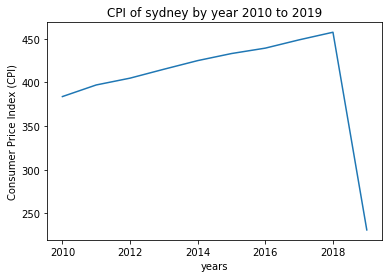

In [20]:
plt.plot(sydney_cpi.index, sydney_cpi.index_number)
plt.xlabel("years")
plt.ylabel("Consumer Price Index (CPI)")
plt.title("CPI of sydney by year 2010 to 2019")
plt.show()

Observation: From the above graph, it is clear that CPI have dropped steadily after 2018.
Conclusion of two visuals: House Price Index (HPI) of sydney has rised from the year 2012 and has reached its peak in 2017-18. CPI of sydney has steadily rised from 2010 till 2017 and faced a fall towards 2019

INSIGHTS

Rise in HPI encourages consumer spending which leads to economic growth
Fall in HPI affects consumer confidence and local retail sales, which causes a drop in CPI and hence the economic growth
Drop in HPI may create a high level of negative impact in local economy as HPI are linked with other key indicators of socio-economic conditions like local sales, Construction, household wealth and so on.

NOTE: REFER INSIGHT REPORT FOR MORE DETAILED INSIGHTS
    
------------------------------------END OF NOTEBOOK-----------------------------------------------